In [1]:
import matplotlib.pyplot as plt
import straph as sg
import networkx as nx

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

# Graph Theory Properties

## Stable DAG Parallel Framework

As explained precedently, a stable connected component, $C = (I,X)$, can be reduced to a static graph $G_C = (X,E_C)$, spanning $I$. In practice, interactions occurring inside a stable connected
component can be considered as static links.

The set of stable connected components is denoted by $\mathcal{S}$.

We say that a cluster $C' = (I',X')$ follows another cluster $C = (I,X)$ if and only if:
- $\forall t \in I$, $\forall t'\in I'$, $t < t'$
- $I \cap I' \neq \emptyset$
- $X \cap X' \neq \emptyset$

We define the **stable directed acyclic graph** of a stream graph as the graph $G_\mathcal{S} = (\mathcal{S},E_\mathcal{S})$, with node set $\mathcal{S}$ and in which $(C,C')$ is in $E_\mathcal{S}$ of $C'$ follows $C$. 

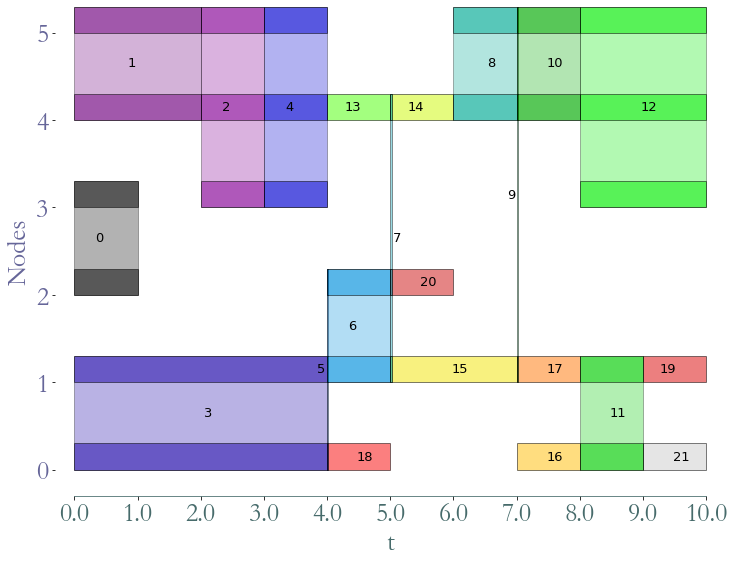

In [3]:
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "example_nodes.sg",
                         path_links=path_directory + "example_links.sg")
G = S.stable_dag()
_ = G.plot()

Using this object, the stable DAG of a stream graph, to compute stream graph properties based on graph theory.

Let us consider a graph property, for example a node's core number, which is an integer. We will focus on its equivalent in a stream graph: a time series. Consider $\mathcal{P}$ a node (or edge) property in graph theory, given a graph $G = (V,E)$, $\mathcal{P}$ is the following application $\mathcal{P} : V \rightarrow \mathbb{R}$ (or $\mathcal{P} : E \rightarrow \mathbb{R}$). We recall that the induced static graph of $S$ at time $t$ is denoted by $G_t = (V_t,E_t)$. The equivalent of such a property in a stream graph $S$ is the time series $(\mathcal{P}(V_t))_{t \in T}$ (or $(\mathcal{P}(E_t))_{t \in T}$).

Our framework consists in applying an efficient graph algorithm to each stable connected
component, represented by an edge list or by an adjacency list/matrix. Each
result will be associated to a time period corresponding to the time window of the
component. Then, results of adjacent stable connected components may need to be
merged together. It can be done by browsing the DAG and aggregated results along the time axis. This framework is highly parallelisable, as graph algorithms can be
computed on each stable connected component independently.

Straph can be hooked with other graph library in order to efficiently compute graph properties on a partition of a stream graph nodes. For example we can use any algorithm implemented in ``networkx``, such as betweenness centrality. We can obtained either a time series for each node, corresponding to its betweenness through time, either a dictionary assigning a betweenness value to a cluster:

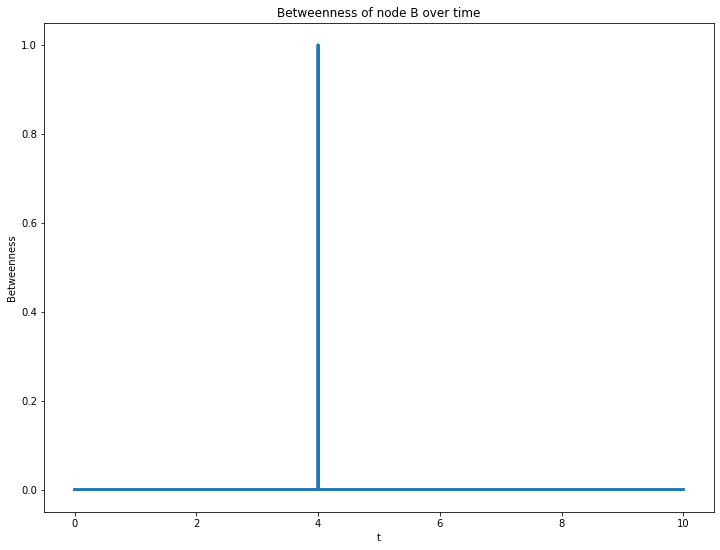

In [4]:
prop_nx = S.graph_property(nx.algorithms.centrality.betweenness_centrality, format = 'signal',
                           datetime=False)
ax = prop_nx[1].plot(linewidth = 3,title = "Betweenness of node B over time",
                    ylabel = "Betweenness",xlabel = "t")

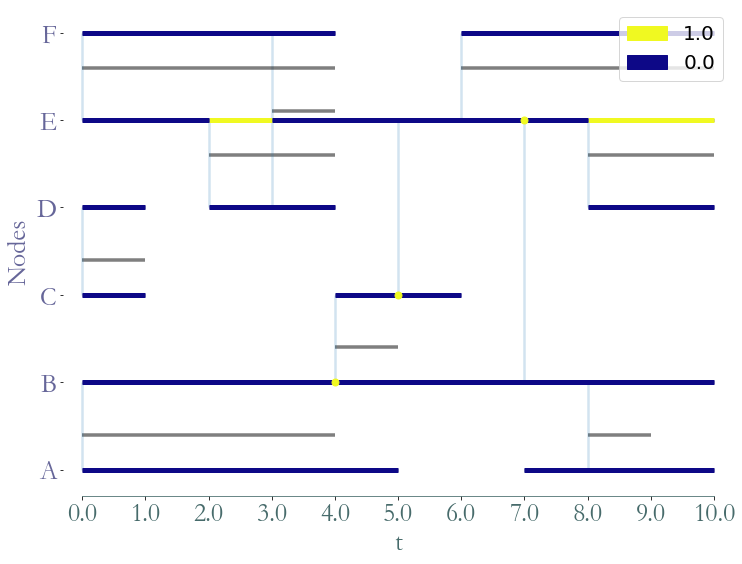

In [5]:
prop_nx = S.graph_property(nx.algorithms.centrality.betweenness_centrality, format = 'cluster')
_ = S.plot(clusters = prop_nx)